<a href="https://colab.research.google.com/github/Ravindra-tabde/DS_Portfolio/blob/main/Ravindra_Tabde_Machine_Learning_04_Mar_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:'Times New Roman';font-weight: bold;font-size:40px;color:#2b31ab">Machine Learning Project</li>
</ul>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problem Statement:

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose,you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’,you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.

#### Data Dictionary for Cubic zarconia Manufacture:


*	Age	     : Age in years	
*	Gender	 : Male or Female category	
*	Engineer : Educational Status 	
*	MBA	     : Educational Status	
*	Work_Exp : Work  experience in years	
*	Salary   : Salary income
*	Distance : Distance in kilometres	
*	License  : Driving license status	
*	Transport: Mode of transport 	


#### 1.1 Read the dataset. Do the descriptive statistics and do null value condition check.

#### 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (5 pts). Interpret the inferences for each (3 pts)

#### 1.3 Encode the data (having string values) for Modelling(2 pts). Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) (2 pts).

#### 1.4 Apply Logistic Regression(4 pts). Interpret the inferences of both model s (2 pts)

#### 1.5 Apply KNN Model(4 pts). Interpret the inferences of each model (2 pts)

#### 1.6 Bagging ( 4 pts) and Boosting (4 pts), Model Tuning (4 pts).

#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (5 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)

#### 1.8  Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

### Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")


In [ ]:
plt.rcParams['font.size']=16
np.set_printoptions(suppress=True)
sns.set_style("darkgrid")
pd.set_option('display.max_rows', 100)

**This project is all about the machine Learning project. the dataset contain information about the car insurance prices of the different models of the cars for year 2022.**


### Loading the data set

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Great_Learning_Content/6_Machine_Learning/Project_ML/Transport.csv')

In [ ]:
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport
5,26,Male,1,0,4,12.3,4.8,1,Public Transport
6,28,Male,1,0,5,14.4,5.1,0,Private Transport
7,26,Female,1,0,3,10.5,5.1,0,Public Transport
8,22,Male,1,0,1,7.5,5.1,0,Public Transport
9,27,Male,1,0,4,13.5,5.2,0,Public Transport


In [ ]:
df.shape

### Basic Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [ ]:
# to check the catagorical feature and its unique sub catagory
for i in df.columns: 
    if df[i].dtype == 'object': 
        print('\n')
        print('feature:',i)
        print(pd.Categorical(df[i].unique()))
    



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']


feature: Transport
['Public Transport', 'Private Transport']
Categories (2, object): ['Private Transport', 'Public Transport']


In [ ]:
#Checking for missing Values
df.isna().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

* There is no missing values in the feature.

In [ ]:
# Descriptive stat summary for all variable
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.Engineer.unique()

array([0, 1], dtype=int64)

In [ ]:
df.MBA.unique()

array([0, 1], dtype=int64)

In [ ]:
df.license.unique()

array([0, 1], dtype=int64)

In [ ]:
## Making copy of original data
df1=df.copy()

In [ ]:
# Engineer ,MBA and License is a discrete data we can convert it into the catagories for Univariate analysis
df1.Engineer=df1.Engineer.astype('object')
df1.MBA=df1.MBA.astype('object')
df1.license=df1.license.astype('object')

In [ ]:
# Descriptive stat summary for catagorical variable
df1.describe(include=['object'])

,Gender,Engineer,MBA,license,Transport
count,444,444,444,444,444
unique,2,2,2,2,2
top,Male,1,0,0,Public Transport
freq,316,335,332,340,300


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    object 
 3   MBA        444 non-null    object 
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    object 
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.3+ KB


In [ ]:
#Checking for ducplicate Value
dup = df1.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [ ]:
# No duplicate entries found.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    object 
 3   MBA        444 non-null    object 
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    object 
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.3+ KB


In [ ]:
table = pd.concat([df1.skew(), df1.kurtosis()], axis=1, join="inner")
table=table.rename(columns={0:'Skewness',1:'kurtosis'})
table

,Skewness,kurtosis
Age,0.955276,0.938871
Engineer,-1.186708,-0.594422
MBA,1.144763,-0.692657
Work Exp,1.352840,1.478573
Salary,2.044533,3.479377
Distance,0.539851,0.191465
license,1.259293,-0.416075


### Univariate Analysis

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4


In [ ]:
def univariate_analysis1(column,nbins):
    print("Distribution of " + column)
    print('------------------------------------------------')
    sns.set_style("darkgrid")
    sns.histplot(df1[column], kde=True,palette='colorblind');
    plt.show()
    
    print("BoxPlot of " + column)
    print('------------------------------------------------')
    ax = sns.boxplot(x=df1[column],color='y')
    plt.show()
    

In [ ]:
df_num=df1.select_dtypes(include=('float64','int64'))

In [ ]:
numeric_columns = list(df_num.columns.values)

Distribution of Age
------------------------------------------------


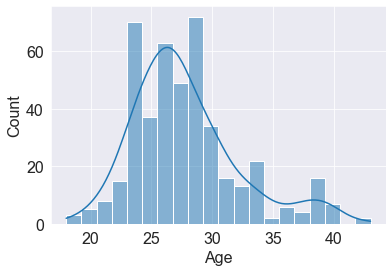

BoxPlot of Age
------------------------------------------------


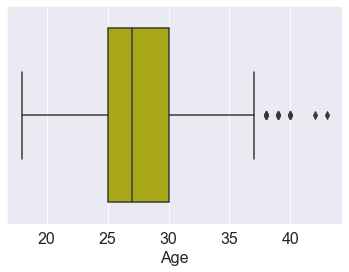

Distribution of Work Exp
------------------------------------------------


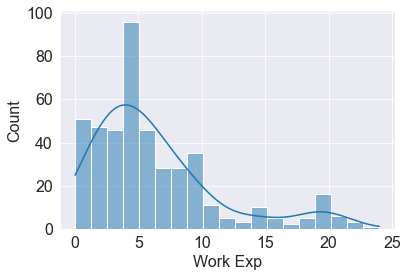

BoxPlot of Work Exp
------------------------------------------------


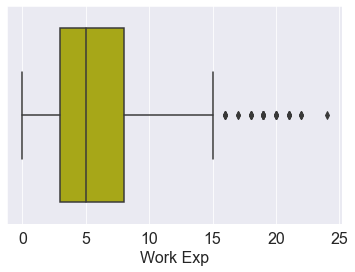

Distribution of Salary
------------------------------------------------


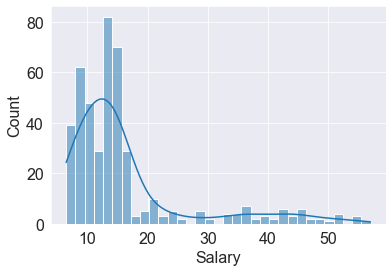

BoxPlot of Salary
------------------------------------------------


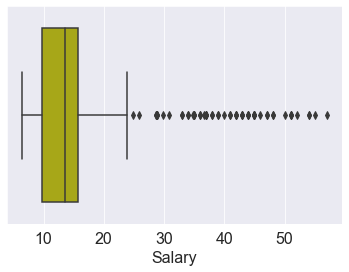

Distribution of Distance
------------------------------------------------


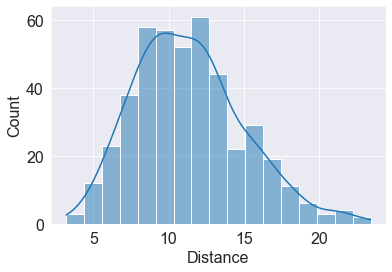

BoxPlot of Distance
------------------------------------------------


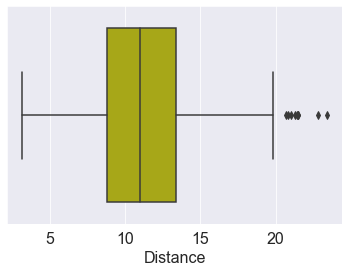

In [ ]:
for x in numeric_columns:
    univariate_analysis1(x,10)

In [ ]:
## Categorical Variable

In [ ]:
df_cat=df1.select_dtypes(include=('object'))
df_cat.columns

Index(['Gender', 'Engineer', 'MBA', 'license', 'Transport'], dtype='object')

In [ ]:
# Values count for catagorical variable
for i in df1.columns:  
    if df1[i].dtype == 'object':
        print('\n')
        print('feature:',i)
        print(df1[i].value_counts())



feature: Gender
Male      316
Female    128
Name: Gender, dtype: int64


feature: Engineer
1    335
0    109
Name: Engineer, dtype: int64


feature: MBA
0    332
1    112
Name: MBA, dtype: int64


feature: license
0    340
1    104
Name: license, dtype: int64


feature: Transport
Public Transport     300
Private Transport    144
Name: Transport, dtype: int64


In [ ]:
## Catagorical variable analysis
def univariateAnalysis_cat(column):
    plt.figure()
    plt.figure(figsize=(9,7))
    print("Count of " + column)
    print("---------------------------------------------------------------------------")
    sns.set_style("darkgrid")
    ay=sns.countplot(data=df_cat,x=df_cat[column])
    plt.ylabel("Count")
    
    ncount=df.shape[0]
    
    for p in ay.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
    plt.show()
    

In [ ]:
list_df_cat=list(df_cat.columns.values)

Count of Gender
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

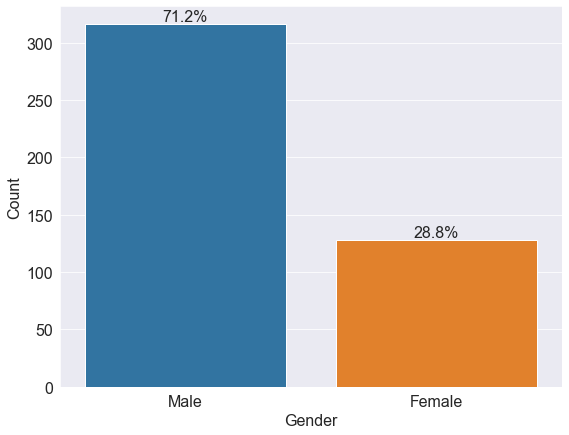

Count of Engineer
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

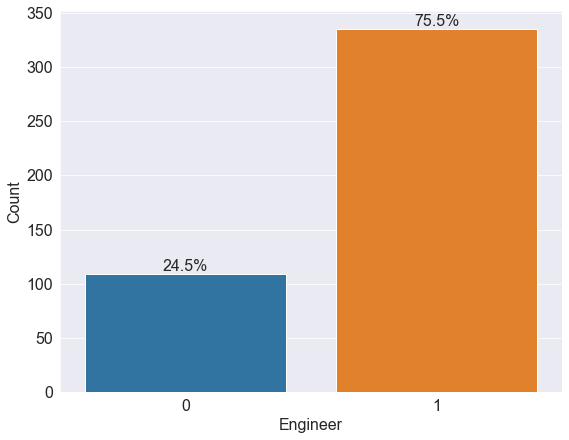

Count of MBA
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

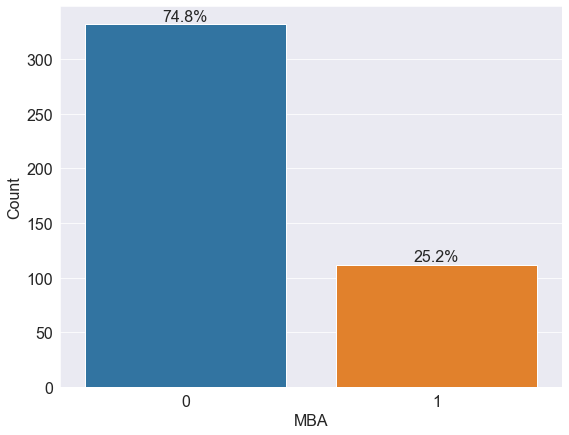

Count of license
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

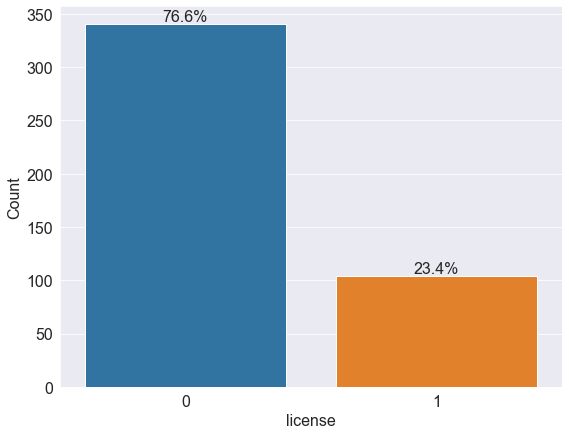

Count of Transport
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

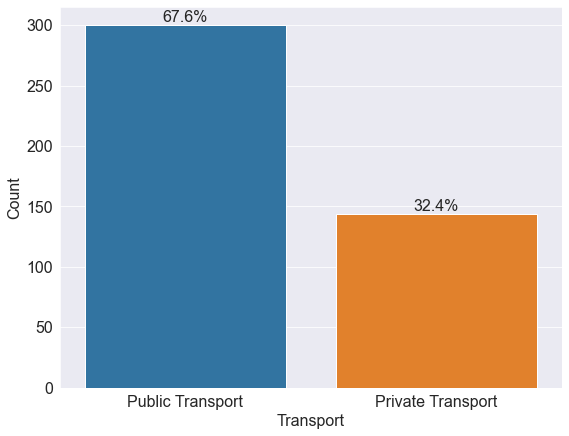

In [ ]:
for x in list_df_cat:
    univariateAnalysis_cat(x)

### Bivariate Analysis

#### Target Variable vs indepenent catagorical variable

In [ ]:
## Target variable Vs catagorical variable analysis
def univariateAnalysis_cat1(column):
    plt.figure()
    plt.figure(figsize=(9,7))
    print("Count of " + column)
    print("---------------------------------------------------------------------------")
    sns.set_style("darkgrid")
    ay=sns.countplot(data=df_cat,x=df_cat[column],hue='Transport')
    plt.ylabel("Count")
    
    ncount=df.shape[0]
    
    for p in ay.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
    plt.show()

In [ ]:
list_df_cat=list(df_cat.columns.values)

Count of Gender
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

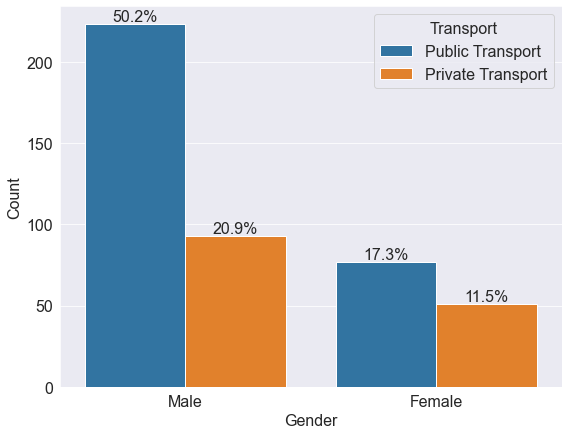

Count of Engineer
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

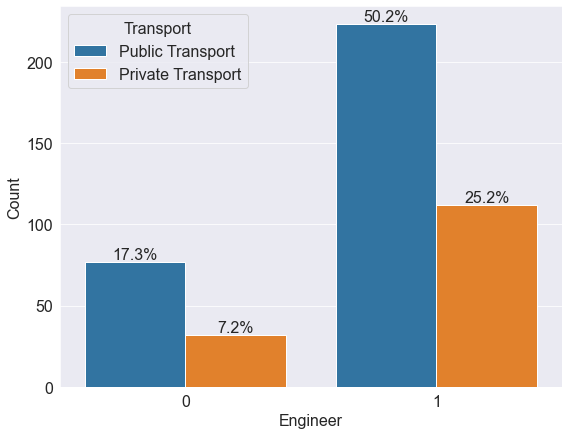

Count of MBA
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

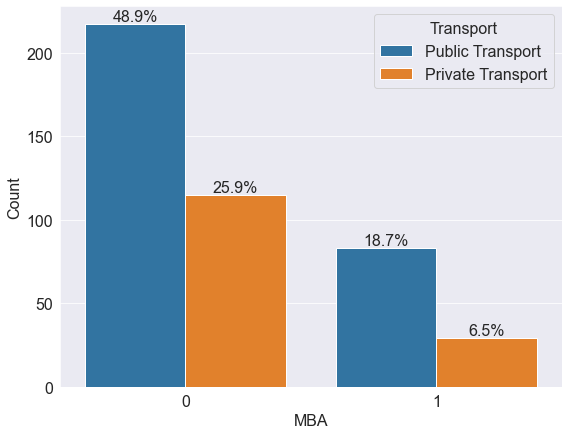

Count of license
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

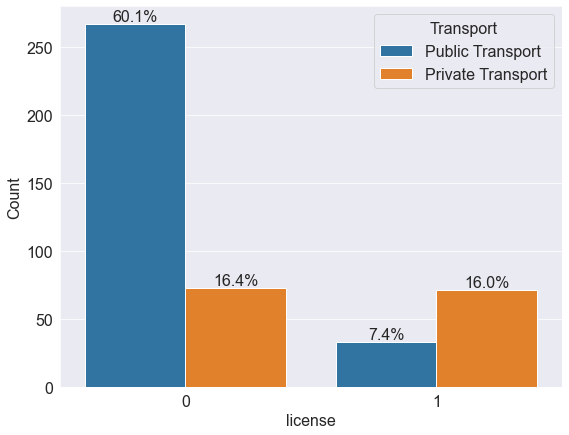

Count of Transport
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

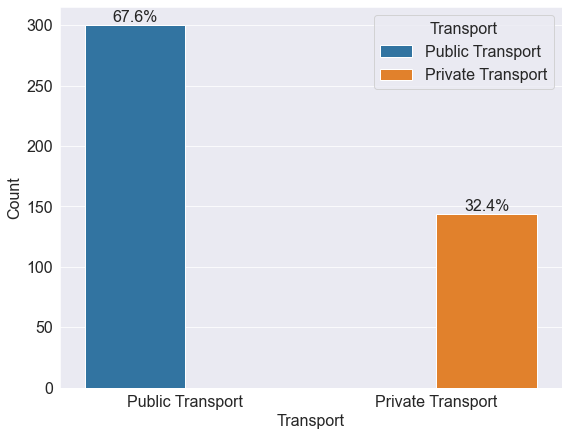

In [ ]:
for x in list_df_cat:
    univariateAnalysis_cat1(x)

#### Target Variable  vs indepenent numeric variable

In [ ]:
df_num.columns

Index(['Age', 'Work Exp', 'Salary', 'Distance'], dtype='object')

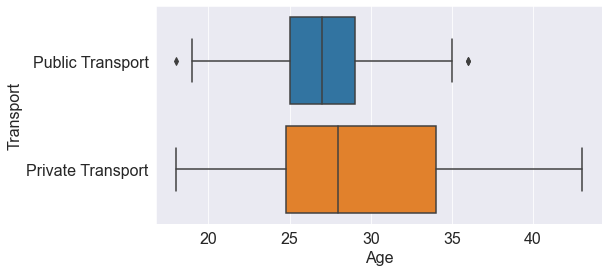

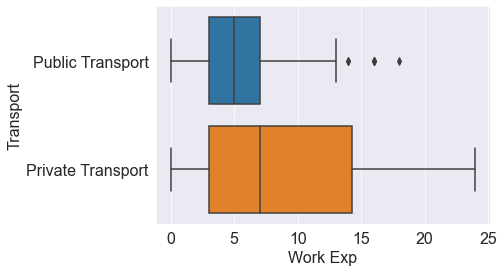

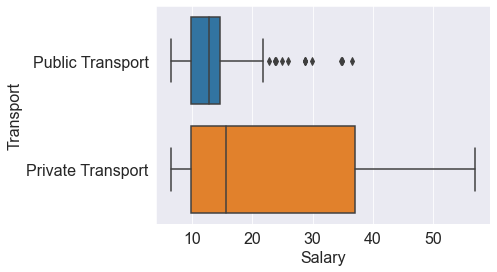

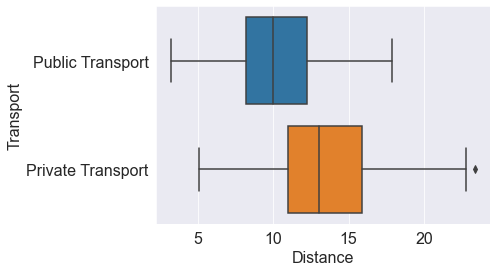

In [ ]:
## Analyzing Transport distribution vs numeric independent variables 

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
for i in df_num.columns:
    sns.boxplot(x= i, y='Transport', data=df1)
    plt.show();

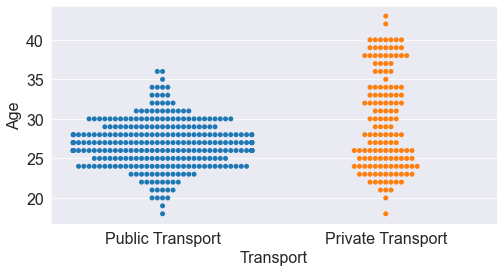

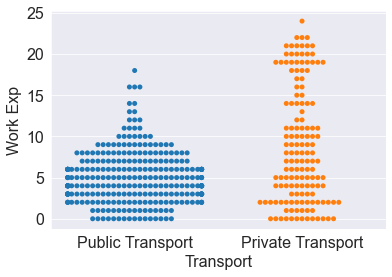

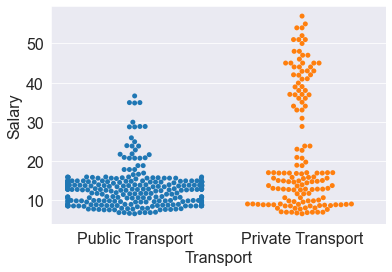

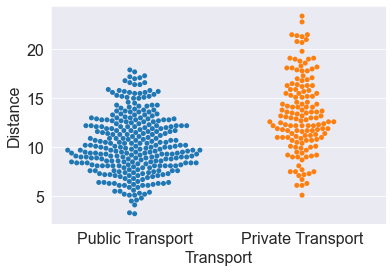

In [ ]:
## Analyzing Transport distribution vs numeric independent variables 

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
for i in df_num.columns:
    sns.swarmplot(x='Transport', y= i,data=df1)
    plt.show();   

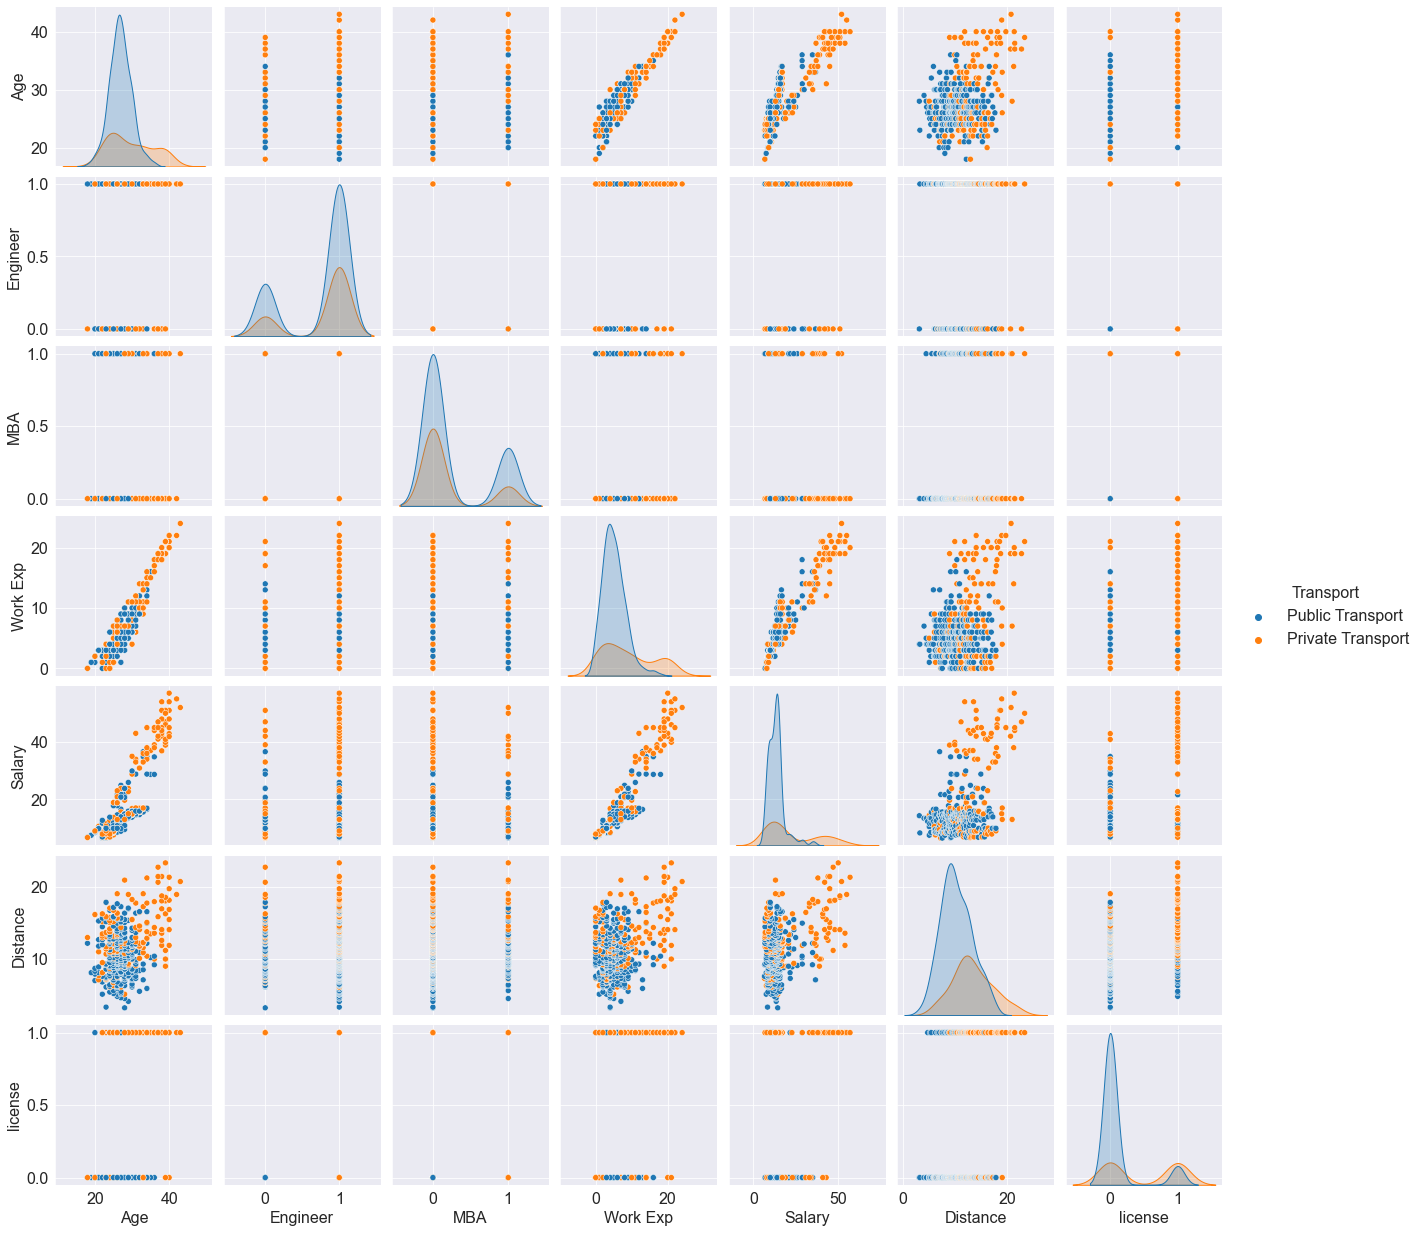

In [ ]:
# Check Pairplot for of variables

sns.pairplot(data=df,diag_kind='kde',hue='Transport')

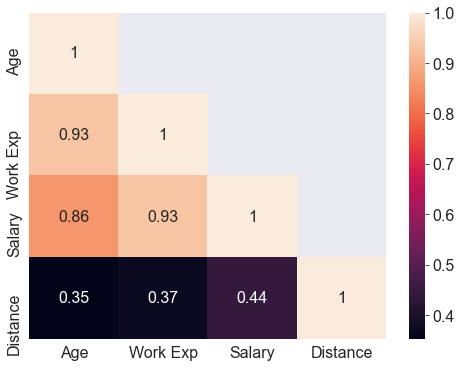

In [ ]:
# heatmap for corelation values
corr = df1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,mask=np.triu(corr,+1));

### Data Preparation 

In [ ]:
## Making copy of original data
df_data=df1.copy()

In [ ]:
df_data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    object 
 3   MBA        444 non-null    object 
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    object 
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.3+ KB


In [ ]:
list(df_num.columns)

['Age', 'Work Exp', 'Salary', 'Distance']

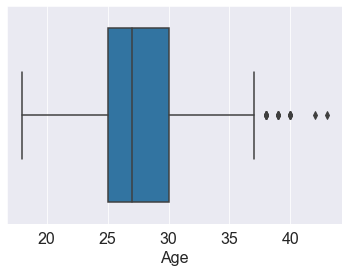

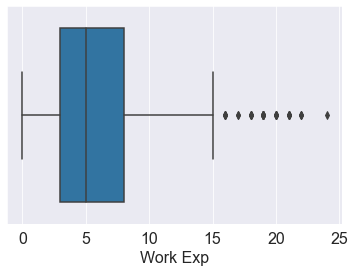

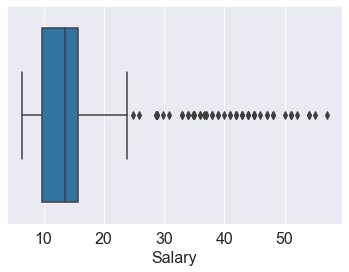

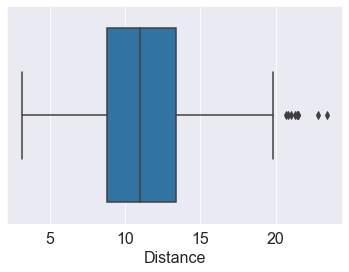

In [ ]:
# checking outliers

colmn = list(df_num.columns)
for i in colmn:
    sns.boxplot(df_data[i],whis=1.5)
    plt.show();

In [ ]:
Q1 = df_num.quantile(0.25)
Q1

Age         25.0
Work Exp     3.0
Salary       9.8
Distance     8.8
Name: 0.25, dtype: float64

In [ ]:
#percentage of outliers present in the dataset
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()/df_num.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Age,5.63
Work Exp,8.56
Salary,13.29
Distance,2.03


In [ ]:
#Convert all objects to categorical codes
for feature in df_data.columns: 
    if df_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_data[feature].unique()))
        print(pd.Categorical(df_data[feature].unique()).codes)
        df_data[feature] = pd.Categorical(df_data[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: Engineer
[0, 1]
Categories (2, int64): [0, 1]
[0 1]


feature: MBA
[0, 1]
Categories (2, int64): [0, 1]
[0 1]


feature: license
[0, 1]
Categories (2, int64): [0, 1]
[0 1]


feature: Transport
['Public Transport', 'Private Transport']
Categories (2, object): ['Private Transport', 'Public Transport']
[1 0]


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    int8   
 2   Engineer   444 non-null    int8   
 3   MBA        444 non-null    int8   
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int8   
 8   Transport  444 non-null    int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 16.2 KB


In [ ]:
df_data.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,1
1,23,0,1,0,4,8.3,3.3,0,1
2,29,1,1,0,7,13.4,4.1,0,1
3,28,0,1,1,5,13.4,4.5,0,1
4,27,1,1,0,4,13.4,4.6,0,1
5,26,1,1,0,4,12.3,4.8,1,1
6,28,1,1,0,5,14.4,5.1,0,0
7,26,0,1,0,3,10.5,5.1,0,1
8,22,1,1,0,1,7.5,5.1,0,1
9,27,1,1,0,4,13.5,5.2,0,1


In [ ]:
#Proportion of 1s and 0s

df_data.Transport.value_counts(normalize=True)

1    0.675676
0    0.324324
Name: Transport, dtype: float64

In [ ]:
# Arrange data into independent variables and dependent variables

X = df_data.drop('Transport', axis=1) ## Features
y = df_data['Transport'] ## Target



### Data Split: Split the data into test and train.(size=0.30), random_state=1.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, stratify = y, random_state=21)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(310, 8)
(134, 8)
(310,)
(134,)


In [ ]:
y_train.value_counts()

1    209
0    101
Name: Transport, dtype: int64

In [ ]:
y_test.value_counts()

1    91
0    43
Name: Transport, dtype: int64

### Scaling
We need to do scaling before using distance based models like we used KNN here we need scaled data for KNN model. Standard Scaling , or Min-Max scaling either one of these can used.
* When to do scaling?
Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances
* In many algorithms, when we desire faster convergence, scaling is a MUST like in Neural Network.

In [ ]:
## Scaling the data using the StandardScaler function

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
X_train_sc= pd.DataFrame(scaler.fit_transform(X_train),
                   columns=list(X_train.columns))
X_test_sc= pd.DataFrame(scaler.fit_transform(X_test),
                   columns=list(X_test.columns))

### Logistic Regression Model

####  Basic Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Fit Logistic Reggression model
logreg= LogisticRegression (solver='newton-cg',penalty='none',max_iter=1000,verbose=True,n_jobs=1,random_state=21)
LR_1=logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


In [ ]:
# Predicting on the Training Data
Y_train_predict = LR_1.predict(X_train)
# Predicting on the Test Data
Y_test_predict = LR_1.predict(X_test)

In [ ]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Y_train_predict)))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Y_test_predict)))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,LR_1.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,LR_1.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Y_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Y_test_predict))

Train Accuracy is : 0.8129032258064516

Test Accuracy is : 0.7910447761194029

Train ROC-AUC score is : 0.8254299114121938

Test ROC-AUC score is : 0.8244313825709174

Confusion matrix for train set :  
 [[ 59  42]
 [ 16 193]]

Confusion matrix for test set :  
 [[25 18]
 [10 81]]


Classification report Train set :
              precision    recall  f1-score   support

           0       0.79      0.58      0.67       101
           1       0.82      0.92      0.87       209

    accuracy                           0.81       310
   macro avg       0.80      0.75      0.77       310
weighted avg       0.81      0.81      0.80       310



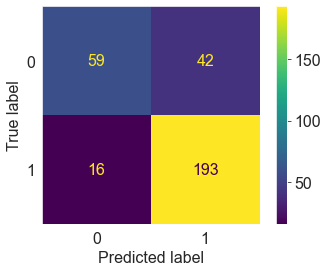

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,Y_train_predict))
plot_confusion_matrix(LR_1,X_train,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        43
           1       0.82      0.89      0.85        91

    accuracy                           0.79       134
   macro avg       0.77      0.74      0.75       134
weighted avg       0.78      0.79      0.78       134



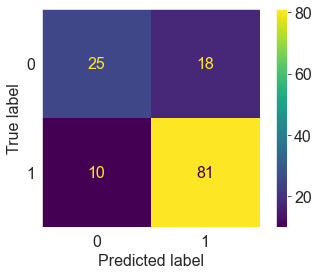

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,Y_test_predict))
plot_confusion_matrix(LR_1,X_test,y_test)
plt.grid(False)

Logistic regression Train: ROC AUC=0.825
Logistic regression test: ROC AUC=0.824


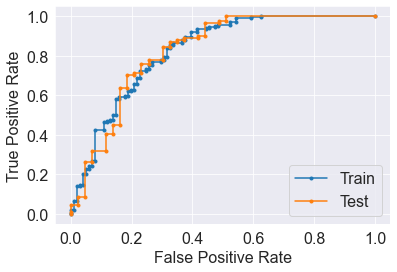

In [ ]:
#train
lr_probs =LR_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Logistic regression Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = LR_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic regression test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# The estimated coefficients/features for logistic model:
coef=LR_1.coef_
pd.DataFrame(coef,columns=X_train.columns).T

,0
Age,0.188538
Gender,1.220055
Engineer,-0.139701
MBA,0.741645
Work Exp,-0.131588
Salary,-0.065374
Distance,-0.228141
license,-2.024717


In [ ]:
# for comparison perpuse we can save result of each model
model_name = []
model_Train_Accuracy = []
model_Test_Accuracy = []
Train_ROC_AUC_score =[]
Test_ROC_AUC_score =[]

model_name.append('Logistic_reg_basic_model')
model_Train_Accuracy.append(accuracy_score(y_train,Y_train_predict))
model_Test_Accuracy.append(accuracy_score(y_test,Y_test_predict))
Train_ROC_AUC_score.append(roc_auc_score(y_train,LR_1.predict_proba(X_train)[:,1]))
Test_ROC_AUC_score.append(roc_auc_score(y_test,LR_1.predict_proba(X_test)[:,1]))

#### Hyper parameter tuning of Logistic regression Classifier- 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'max_iter': [100,500,1000],
          'C' :     [0.05, 0.1, 0.5, 1, 5]}
                     

In [ ]:
LR_2 = GridSearchCV(LogisticRegression(),param_grid=params,refit=True,verbose=3,cv=5, n_jobs=1)
LR_2.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.05, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.1s
[CV 2/5] END C=0.05, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.05, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.05, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.05, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.05, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.05, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.05, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END .C=0.05, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END .C=0.05, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.05, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.05, max_it

[CV 4/5] END C=0.05, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV 5/5] END C=0.05, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV 1/5] END C=0.05, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.05, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.05, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.05, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.05, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.05, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.05, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.05, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END .C=0.05, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END .C=0.05, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END 

[CV 5/5] END C=0.05, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV 1/5] END C=0.05, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.05, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.05, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.05, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.05, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.05, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.05, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.05, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.05, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.05, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.05, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV 

[CV 3/5] END C=0.05, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV 4/5] END C=0.05, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV 5/5] END C=0.05, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..

[CV 5/5] END .C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0

[CV 4/5] END .C=0.1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV 5/5] END .C=0.1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END .C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END .C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END 

[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=0.5, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.5, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0.5, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=0.5, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=0.5, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.5

[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ....C=0.5, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ....C=0.5, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ....C=0.5, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ....C=0.5, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ....C=0.5, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ...C=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...C=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.5, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.5, max_

[CV 2/5] END ..C=0.5, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ..C=0.5, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ..C=0.5, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..C=0.5, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END 

[CV 4/5] END .....C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .....C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ....C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ....C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ....C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1, max_iter=1

[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1, max_iter=5

[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1, max

[CV 4/5] END C=5, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=5, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....C=5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....C=5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ....C=5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ....C=5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ....C=5, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ......C=5, max_

[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....C=5, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ....C=5, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ....C=5, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ....C=5, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ....C=5, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ......C=5, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END ......C=5, max_

[CV 1/5] END ...C=5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=5, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=5, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=5, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=5, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=5, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=5, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END .....C=5, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END .....C=5, max_iter=1000, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END .....C=5, 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.05, 0.1, 0.5, 1, 5],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [ ]:
LR_2.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
# Predicting on the Training Data
Grid_train_predict = LR_2.predict(X_train)
# Predicting on the Test Data
Grid_test_predict = LR_2.predict(X_test)

In [ ]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Grid_train_predict)))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Grid_test_predict)))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,LR_2.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,LR_2.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Grid_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Grid_test_predict))

Train Accuracy is : 0.8064516129032258

Test Accuracy is : 0.7985074626865671

Train ROC-AUC score is : 0.8245298214031929

Test ROC-AUC score is : 0.8216202402248913

Confusion matrix for train set :  
 [[ 56  45]
 [ 15 194]]

Confusion matrix for test set :  
 [[25 18]
 [ 9 82]]


Classification report Train set :
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       101
           1       0.81      0.93      0.87       209

    accuracy                           0.81       310
   macro avg       0.80      0.74      0.76       310
weighted avg       0.80      0.81      0.80       310



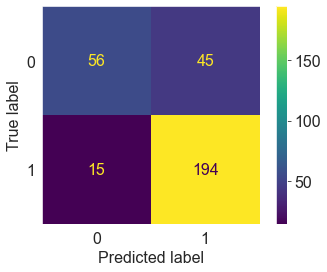

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,Grid_train_predict))

plot_confusion_matrix(LR_2,X_train,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        43
           1       0.82      0.90      0.86        91

    accuracy                           0.80       134
   macro avg       0.78      0.74      0.75       134
weighted avg       0.79      0.80      0.79       134



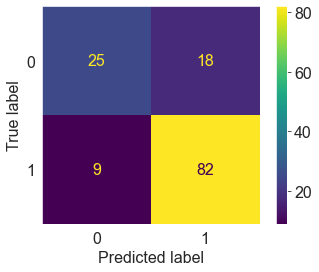

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,Grid_test_predict))
plot_confusion_matrix(LR_2,X_test,y_test)
plt.grid(False)

Logistic regression Train: ROC AUC=0.825
Logistic regression test: ROC AUC=0.822


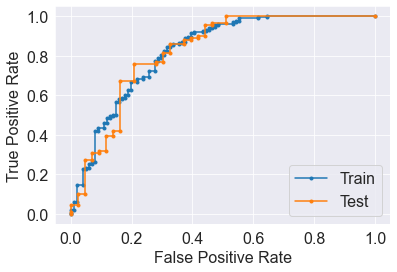

In [ ]:
#train
lr_probs =LR_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Logistic regression Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')


#test
lr_probs = LR_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic regression test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
model_name.append('Logistic_reg_tune_model')
model_Train_Accuracy.append(accuracy_score(y_train,Grid_train_predict))
model_Test_Accuracy.append(accuracy_score(y_test,Grid_test_predict))
Train_ROC_AUC_score.append((roc_auc_score(y_train,LR_2.predict_proba(X_train)[:,1])))
Test_ROC_AUC_score.append(roc_auc_score(y_test,LR_2.predict_proba(X_test)[:,1]))

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# chhecking missclasification % for diff n values
error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sc,y_train)
    pred_i=knn.predict(X_test_sc)
    error.append(np.mean(pred_i!=y_test))

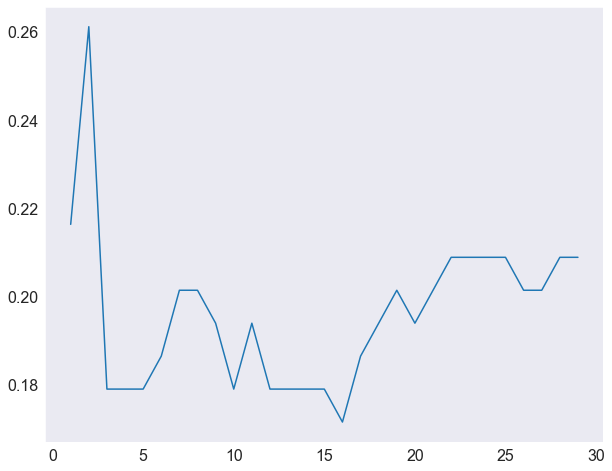

In [ ]:
# plt misclassification % vs n values
plt.figure(figsize=(10,8))
plt.plot(range(1,30),error)
plt.grid()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [ ]:
Y_train_predict = knn.predict(X_train_sc)
Y_test_predict = knn.predict(X_test_sc)

In [ ]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Y_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Y_test_predict)))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test_sc)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Y_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Y_test_predict))

Train Accuracy is : 0.8483870967741935

Test Accuracy is : 0.8208955223880597

Train ROC-AUC score is : 0.9232554834430812

Test ROC-AUC score is : 0.8121645796064401

Confusion matrix for train set :  
 [[ 66  35]
 [ 12 197]]

Confusion matrix for test set :  
 [[24 19]
 [ 5 86]]


Classification report Train set :
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       101
           1       0.85      0.94      0.89       209

    accuracy                           0.85       310
   macro avg       0.85      0.80      0.82       310
weighted avg       0.85      0.85      0.84       310



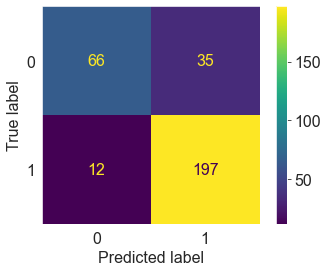

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,Y_train_predict))
plot_confusion_matrix(knn,X_train_sc,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        43
           1       0.82      0.95      0.88        91

    accuracy                           0.82       134
   macro avg       0.82      0.75      0.77       134
weighted avg       0.82      0.82      0.81       134



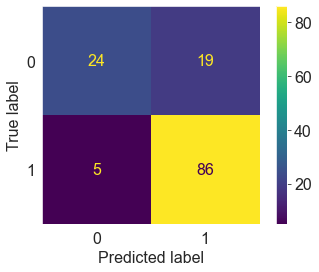

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,Y_test_predict))
plot_confusion_matrix(knn,X_test_sc,y_test)
plt.grid(False)

KNN Classifier Train: ROC AUC=0.923
KNN Classifier test: ROC AUC=0.812


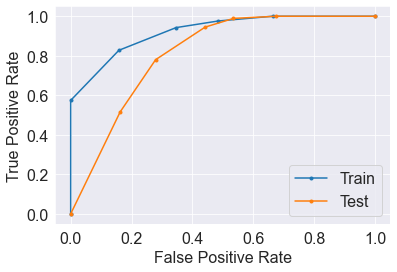

In [ ]:
#train
lr_probs =knn.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
model_name.append('KNN_Classifier_basic_model')
model_Train_Accuracy.append(accuracy_score(y_train,Y_train_predict))
model_Test_Accuracy.append(accuracy_score(y_test,Y_test_predict))
Train_ROC_AUC_score.append(roc_auc_score(y_train,knn.predict_proba(X_train_sc)[:,1]))
Test_ROC_AUC_score.append(roc_auc_score(y_test,knn.predict_proba(X_test_sc)[:,1]))

#### Hyper parameter tuning of KNN Classifier- 

In [ ]:
params = {'n_neighbors':[5,7,9,11,15,17],
         'weights':['uniform', 'distance'],'p':[1,2,3]}

In [ ]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1,n_jobs=-1)
grid_knn.fit(X_train_sc,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 15, 17], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
grid_knn.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [ ]:
Grid_train_predict=grid_knn.predict(X_train_sc)
Grid_test_predict=grid_knn.predict(X_test_sc)

In [ ]:

print("Train Accuracy is : {}".format(accuracy_score(y_train,Grid_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Grid_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Grid_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Grid_test_predict))

Train Accuracy is : 0.8516129032258064

Test Accuracy is : 0.8208955223880597

Train ROC-AUC score is : 0.919797242882183

Test ROC-AUC score is : 0.8395093278814209

Confusion matrix for train set :  
 [[ 65  36]
 [ 10 199]]

Confusion matrix for test set :  
 [[24 19]
 [ 5 86]]


Classification report Train set :
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       101
           1       0.85      0.95      0.90       209

    accuracy                           0.85       310
   macro avg       0.86      0.80      0.82       310
weighted avg       0.85      0.85      0.84       310



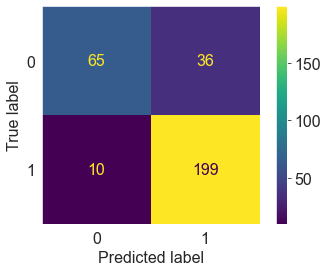

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,Grid_train_predict))
plot_confusion_matrix(grid_knn,X_train_sc,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        43
           1       0.82      0.95      0.88        91

    accuracy                           0.82       134
   macro avg       0.82      0.75      0.77       134
weighted avg       0.82      0.82      0.81       134



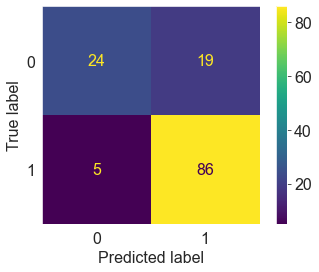

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,Grid_test_predict))
plot_confusion_matrix(grid_knn,X_test_sc,y_test)
plt.grid(False)

KNN Classifier Train: ROC AUC=0.920
KNN Classifier test: ROC AUC=0.840


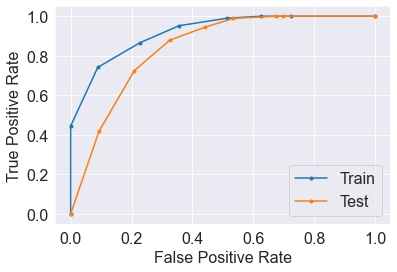

In [ ]:
#train
lr_probs =grid_knn.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('KNN Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = grid_knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
model_name.append('KNN_Classifier_tune_model')
model_Train_Accuracy.append(accuracy_score(y_train,Grid_train_predict))
model_Test_Accuracy.append(accuracy_score(y_test,Grid_test_predict))

Train_ROC_AUC_score.append(roc_auc_score(y_train,grid_knn.predict_proba(X_train_sc)[:,1]))
Test_ROC_AUC_score.append(roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc)[:,1]))

### Boosting Classifier -

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc= GradientBoostingClassifier(random_state = 100,)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=100)

In [ ]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,gbc.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,gbc.predict(X_test))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,gbc.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,gbc.predict_proba(X_test)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,gbc.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,gbc.predict(X_test)))

Train Accuracy is : 0.9806451612903225

Test Accuracy is : 0.7910447761194029

Train ROC-AUC score is : 0.9995736415746838

Test ROC-AUC score is : 0.8226424738052645

Confusion matrix for train set :  
 [[ 95   6]
 [  0 209]]

Confusion matrix for test set :  
 [[27 16]
 [12 79]]


Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       101
           1       0.97      1.00      0.99       209

    accuracy                           0.98       310
   macro avg       0.99      0.97      0.98       310
weighted avg       0.98      0.98      0.98       310



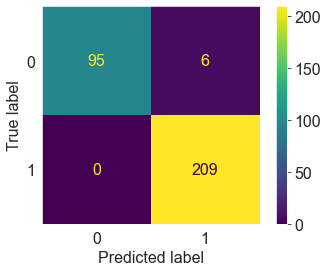

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,gbc.predict(X_train)))
plot_confusion_matrix(gbc,X_train,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        43
           1       0.83      0.87      0.85        91

    accuracy                           0.79       134
   macro avg       0.76      0.75      0.75       134
weighted avg       0.79      0.79      0.79       134



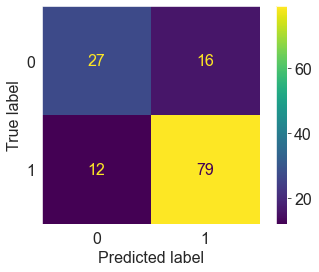

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,gbc.predict(X_test)))
plot_confusion_matrix(gbc,X_test,y_test)
plt.grid(False)

Boosting Classifier Train: ROC AUC=1.000
Boosting Classifier Test: ROC AUC=0.823


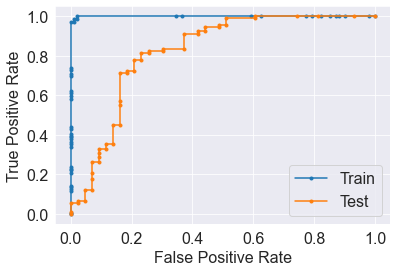

In [ ]:
lr_probs =gbc.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Boosting Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs =gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
model_name.append('GBC_Classifier_basic_model')
model_Train_Accuracy.append(accuracy_score(y_train,gbc.predict(X_train)))
model_Test_Accuracy.append(accuracy_score(y_test,gbc.predict(X_test)))

Train_ROC_AUC_score.append(roc_auc_score(y_train,gbc.predict_proba(X_train)[:,1]))
Test_ROC_AUC_score.append(roc_auc_score(y_test,gbc.predict_proba(X_test)[:,1]))

**Hyperparameter tuning of Boosting Classifier-**

In [ ]:
param_gbc={'learning_rate': [0.01,0.02,0.05,0.075], 'max_depth':[3,4,5,6,7,8],
            'min_samples_split': [9,10,11,12], 'n_estimators':[50,100],'random_state': [100]}    

In [ ]:
grid_gbc_2=GridSearchCV(GradientBoostingClassifier(),param_grid=param_gbc,refit=True,verbose=True,n_jobs=-1)
grid_gbc_2.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.075],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [50, 100], 'random_state': [100]},
             verbose=True)

In [ ]:
grid_gbc_2.best_params_

{'learning_rate': 0.075,
 'max_depth': 5,
 'min_samples_split': 9,
 'n_estimators': 50,
 'random_state': 100}

In [ ]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_gbc_2.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_gbc_2.predict(X_test))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_gbc_2.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_gbc_2.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_gbc_2.predict(X_test)))

Train Accuracy is : 0.9838709677419355

Test Accuracy is : 0.7910447761194029

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.8439815997955532

Confusion matrix for train set :  
 [[ 96   5]
 [  0 209]]

Confusion matrix for test set :  
 [[30 13]
 [15 76]]


Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       101
           1       0.98      1.00      0.99       209

    accuracy                           0.98       310
   macro avg       0.99      0.98      0.98       310
weighted avg       0.98      0.98      0.98       310



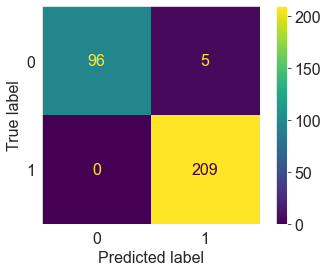

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,grid_gbc_2.predict(X_train)))
plot_confusion_matrix(grid_gbc_2,X_train,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        43
           1       0.85      0.84      0.84        91

    accuracy                           0.79       134
   macro avg       0.76      0.77      0.76       134
weighted avg       0.79      0.79      0.79       134



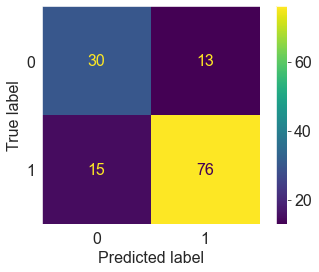

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,grid_gbc_2.predict(X_test)))
plot_confusion_matrix(grid_gbc_2,X_test,y_test)
plt.grid(False)

Boosting Classifier Train: ROC AUC=1.000
Boosting Classifier Test: ROC AUC=0.844


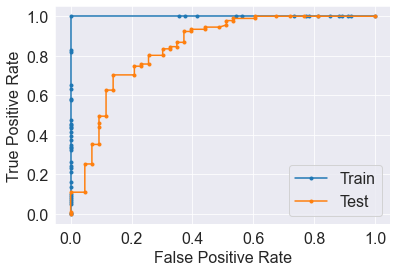

In [ ]:
lr_probs =grid_gbc_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Boosting Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

lr_probs =grid_gbc_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
model_name.append('GBC_Classifier_tune_model')
model_Train_Accuracy.append(accuracy_score(y_train,grid_gbc_2.predict(X_train)))
model_Test_Accuracy.append(accuracy_score(y_test,grid_gbc_2.predict(X_test)))

Train_ROC_AUC_score.append(roc_auc_score(y_train,grid_gbc_2.predict_proba(X_train)[:,1]))
Test_ROC_AUC_score.append(roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test)[:,1]))

###  # Bagging Classifier 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
bag= BaggingClassifier(random_state= 100)
bag.fit(X_train,y_train)

BaggingClassifier(random_state=100)

In [ ]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,bag.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test,bag.predict(X_test))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,bag.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,bag.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,bag.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,bag.predict(X_test)))

Train Accuracy is : 0.9838709677419355

Test Accuracy is : 0.7835820895522388

Train ROC-AUC score is : 0.9986972381448671

Test ROC-AUC score is : 0.8535650396115512

Confusion matrix for train set :  
 [[100   1]
 [  4 205]]

Confusion matrix for test set :  
 [[32 11]
 [18 73]]


Classification report Train set :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       101
           1       1.00      0.98      0.99       209

    accuracy                           0.98       310
   macro avg       0.98      0.99      0.98       310
weighted avg       0.98      0.98      0.98       310



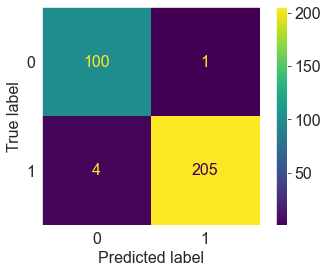

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,bag.predict(X_train)))
plot_confusion_matrix(bag,X_train,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        43
           1       0.87      0.80      0.83        91

    accuracy                           0.78       134
   macro avg       0.75      0.77      0.76       134
weighted avg       0.80      0.78      0.79       134



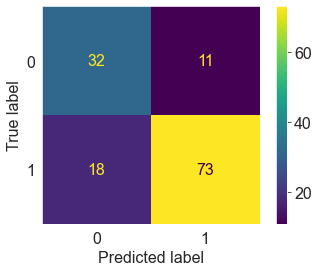

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,bag.predict(X_test)))
plot_confusion_matrix(bag,X_test,y_test)
plt.grid(False)

Bagging Classifier Train: ROC AUC=0.999
Bagging classifier test: ROC AUC=0.854


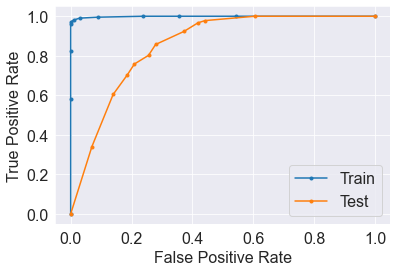

In [ ]:
#train
lr_probs =bag.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Bagging Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = bag.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Bagging classifier test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
model_name.append('Bagging_Classifier_basic_model')
model_Train_Accuracy.append(accuracy_score(y_train,bag.predict(X_train)))
model_Test_Accuracy.append(accuracy_score(y_test,bag.predict(X_test)))

Train_ROC_AUC_score.append(roc_auc_score(y_train,bag.predict_proba(X_train)[:,1]))
Test_ROC_AUC_score.append(roc_auc_score(y_test,bag.predict_proba(X_test)[:,1]))

#### Hyperparameter tuning of Bagging Classifier -

In [ ]:
param_bag={'base_estimator':[RandomForestClassifier()],'max_samples':[5,15,20],'max_features':[3,5],
    'n_estimators' :[101,201],'random_state': [100]}

In [ ]:
grid_bag=GridSearchCV(BaggingClassifier(),param_grid=param_bag,refit=True,verbose=True,n_jobs=-1)
grid_bag.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [RandomForestClassifier()],
                         'max_features': [3, 5], 'max_samples': [5, 15, 20],
                         'n_estimators': [101, 201], 'random_state': [100]},
             verbose=True)

In [ ]:
grid_bag.best_params_

{'base_estimator': RandomForestClassifier(),
 'max_features': 5,
 'max_samples': 20,
 'n_estimators': 101,
 'random_state': 100}

In [ ]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_bag.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_bag.predict(X_test))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_bag.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_bag.predict_proba(X_test)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_bag.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_bag.predict(X_test)))

Train Accuracy is : 0.7903225806451613

Test Accuracy is : 0.7835820895522388

Train ROC-AUC score is : 0.8815671040788289

Test ROC-AUC score is : 0.8262202913365704

Confusion matrix for train set :  
 [[ 39  62]
 [  3 206]]

Confusion matrix for test set :  
 [[18 25]
 [ 4 87]]


Classification report Train set :
              precision    recall  f1-score   support

           0       0.93      0.39      0.55       101
           1       0.77      0.99      0.86       209

    accuracy                           0.79       310
   macro avg       0.85      0.69      0.70       310
weighted avg       0.82      0.79      0.76       310



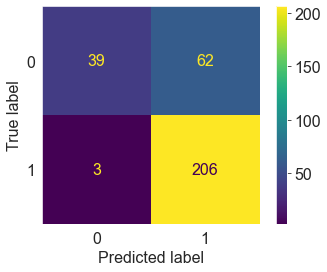

In [ ]:
print('Classification report Train set :')
print(classification_report(y_train,grid_bag.predict(X_train)))

plot_confusion_matrix(grid_bag,X_train,y_train)
plt.grid(False)

Classification report Test set :
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.78      0.96      0.86        91

    accuracy                           0.78       134
   macro avg       0.80      0.69      0.71       134
weighted avg       0.79      0.78      0.76       134



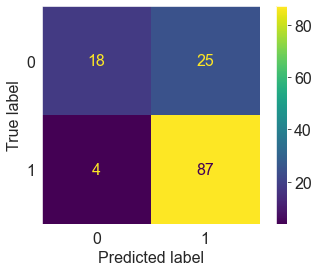

In [ ]:
print('Classification report Test set :')
print(classification_report(y_test,grid_bag.predict(X_test)))
plot_confusion_matrix(grid_bag,X_test,y_test)
plt.grid(False)

Bagging Classifier Train: ROC AUC=0.882
Bagging classifier test: ROC AUC=0.826


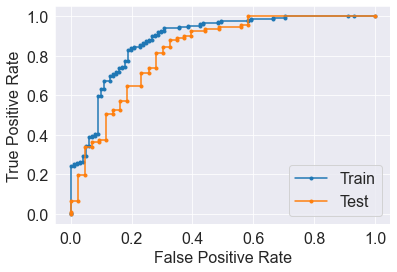

In [ ]:
#train
lr_probs =grid_bag.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Bagging Classifier Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')

#test
lr_probs = grid_bag.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Bagging classifier test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
model_name.append('Bagging_Classifier_tune_model')
model_Train_Accuracy.append(accuracy_score(y_train,grid_bag.predict(X_train)))
model_Test_Accuracy.append(accuracy_score(y_test,grid_bag.predict(X_test)))

Train_ROC_AUC_score.append(roc_auc_score(y_train,grid_bag.predict_proba(X_train)[:,1]))
Test_ROC_AUC_score.append(roc_auc_score(y_test,grid_bag.predict_proba(X_test)[:,1]))

# Comparison of the performance of models

**Plot the combined ROC-AUC curves for all the models (Test Set)-**

Boosting Classifier: ROC AUC=0.844
Logistic regression : ROC AUC=0.822
KNN Classifier: ROC AUC=0.840
Bagging classifier: ROC AUC=0.826


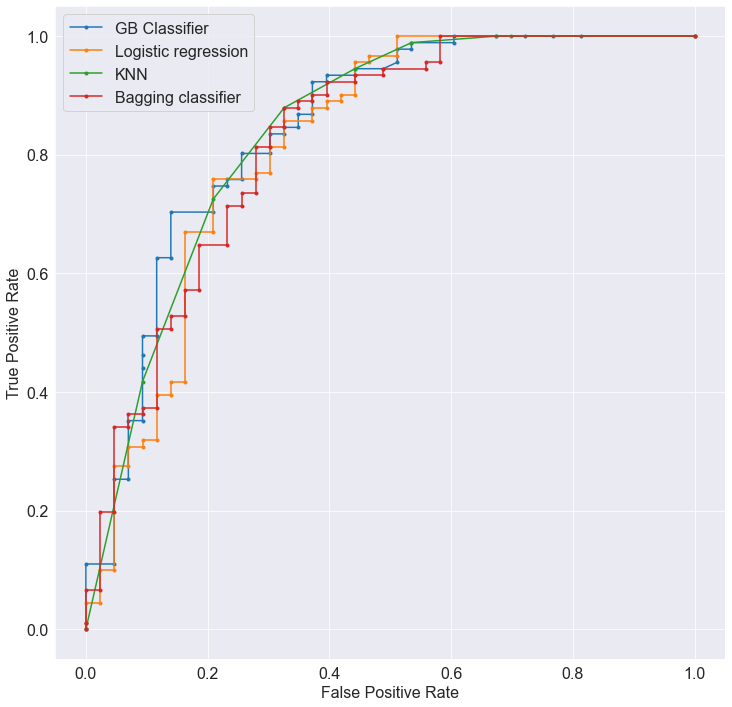

In [ ]:
plt.figure(figsize=(12,12))

# Gradient boosting classifier - 
lr_probs =grid_gbc_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='GB Classifier')


# lOGISTIC REGRESSION Classifier- 

lr_probs =LR_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic regression : ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression')




# KNN Classifier- 
lr_probs = grid_knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

##Bagging

lr_probs = grid_bag.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Bagging classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Bagging classifier')



# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
#Model Evaluation

In [ ]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_Train_Accuracy': model_Train_Accuracy,'model_Test_Accuracy':model_Test_Accuracy,
                          'Train_ROC_AUC_score':Train_ROC_AUC_score,'Test_ROC_AUC_score':Test_ROC_AUC_score})
model_eval

,model_name,model_Train_Accuracy,model_Test_Accuracy,Train_ROC_AUC_score,Test_ROC_AUC_score
0,Logistic_reg_basic_model,0.812903,0.791045,0.825430,0.824431
1,Logistic_reg_tune_model,0.806452,0.798507,0.824530,0.821620
2,KNN_Classifier_basic_model,0.848387,0.820896,0.923255,0.812165
3,KNN_Classifier_tune_model,0.851613,0.820896,0.919797,0.839509
4,GBC_Classifier_basic_model,0.980645,0.791045,0.999574,0.822642
5,GBC_Classifier_tune_model,0.983871,0.791045,1.000000,0.843982
6,Bagging_Classifier_basic_model,0.983871,0.783582,0.998697,0.853565
7,Bagging_Classifier_tune_model,0.790323,0.783582,0.881567,0.826220


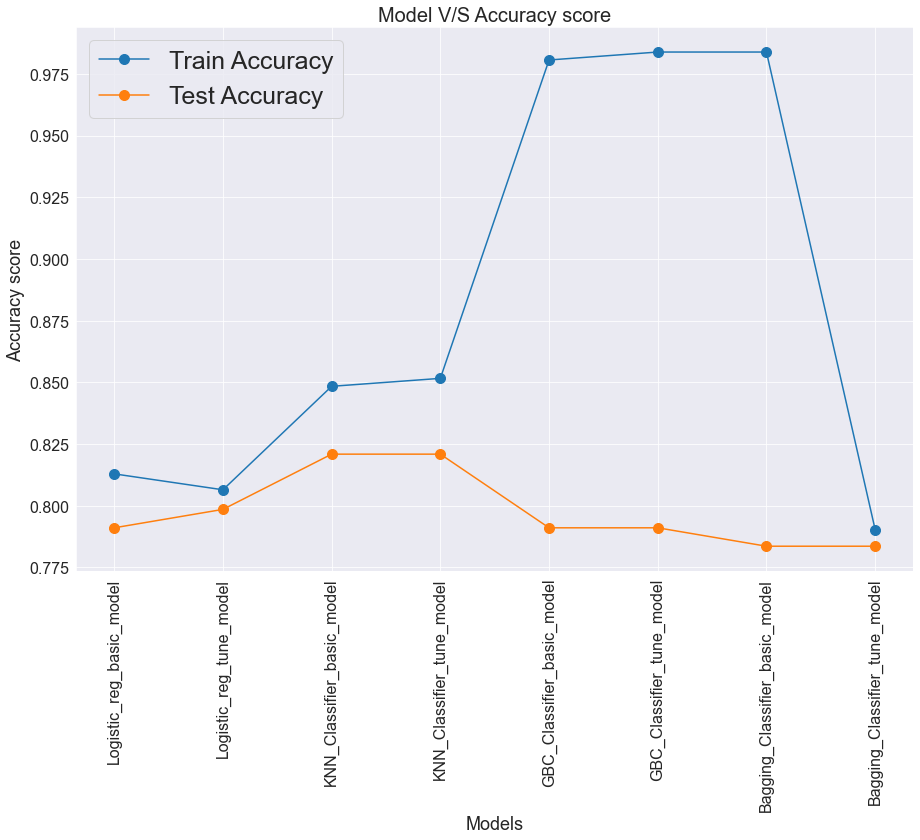

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Model V/S Accuracy score",fontsize=20)
plt.xlabel('Models',fontsize=18)
plt.ylabel('Accuracy score',fontsize=18)
plt.xticks(rotation=90)
ax=plt.plot(model_name,model_Train_Accuracy,marker='o',markersize=10,label='Train Accuracy')
ax=plt.plot(model_name,model_Test_Accuracy,marker='o',markersize=10,label='Test Accuracy')
plt.legend(loc='upper left', frameon=True,prop={'size': 25})
plt.show()

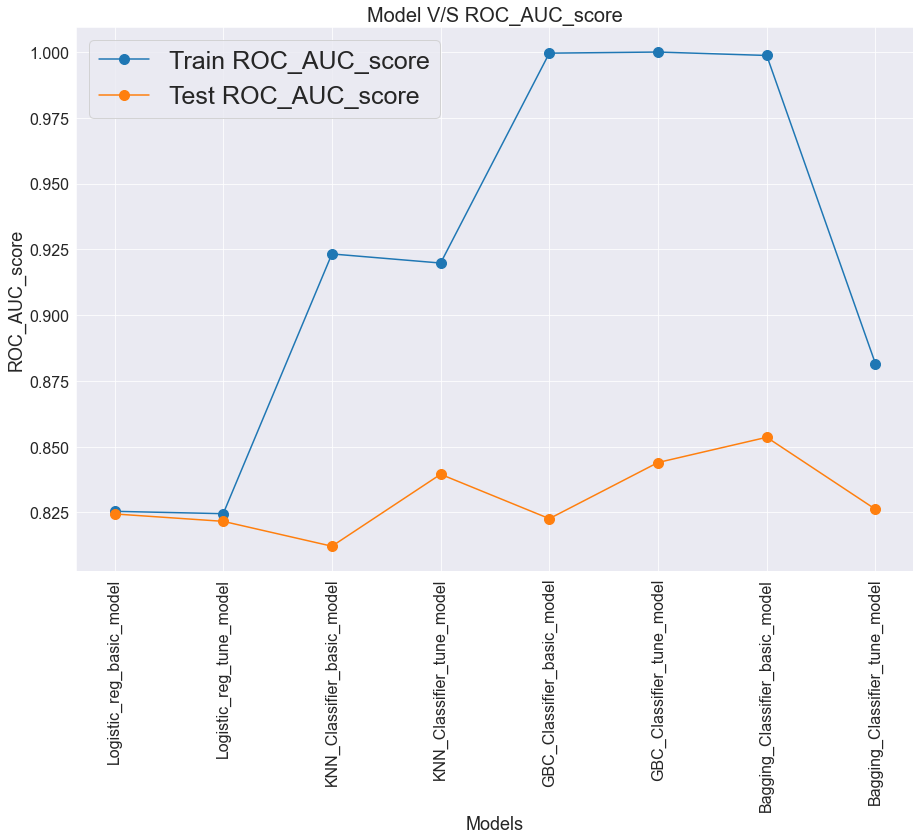

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Model V/S ROC_AUC_score",fontsize=20)
plt.xlabel('Models',fontsize=18)
plt.ylabel('ROC_AUC_score',fontsize=18)
plt.xticks(rotation=90)
ax=plt.plot(model_name,Train_ROC_AUC_score,marker='o',markersize=10,label='Train ROC_AUC_score')
ax=plt.plot(model_name,Test_ROC_AUC_score,marker='o',markersize=10,label='Test ROC_AUC_score')
plt.legend(loc='upper left', frameon=True,prop={'size': 25})
plt.show()

## Model Selection
* After comparing all model with basic and hyperparameter tuning we  can see model KNN classifier model with tuning is the best performing. 
* It has Train accuracy 85% and test accuracy more than 82% which is high amongs the all models also It shows model is good fit for data.
* Also if we compare the AUC-ROC score this model shows has 0.84 score on test data.